<a href="https://colab.research.google.com/github/AlfonsoCastilloFlores/IB_IA_AD2024_1970709/blob/main/P3PDI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

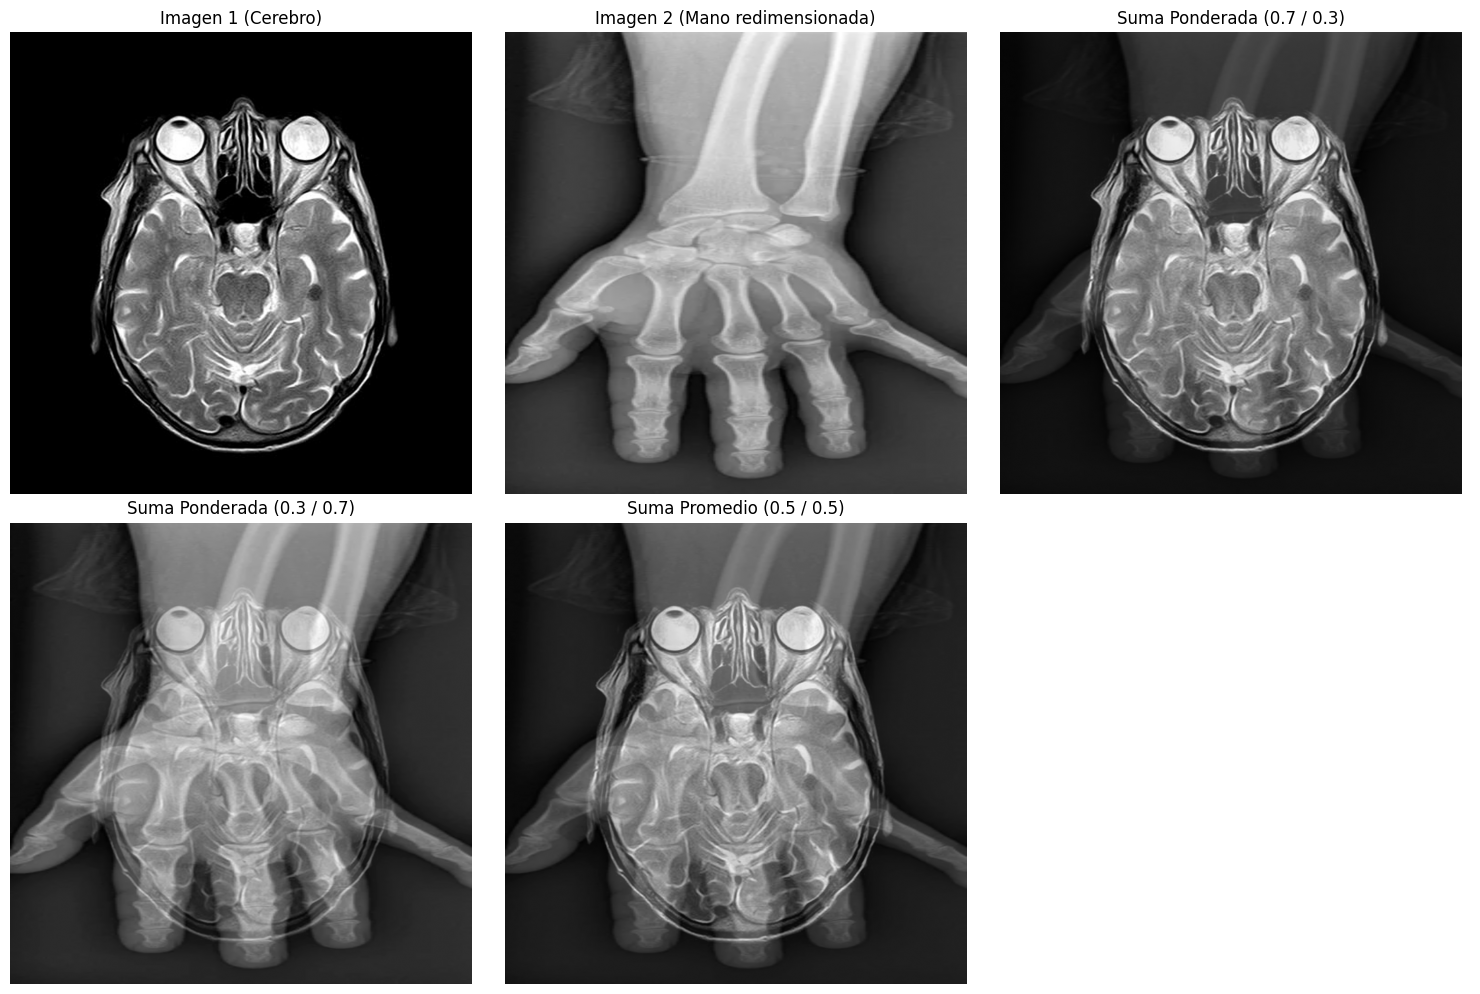

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Cargar las imágenes en escala de grises
img1 = cv2.imread("cerebro.jpg", cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread("hand.jpg", cv2.IMREAD_GRAYSCALE)

# Redimensionar la segunda imagen al tamaño de la primera
img2_resized = cv2.resize(img2, (img1.shape[1], img1.shape[0]))

# Suma ponderada
suma_ponderada_1 = cv2.addWeighted(img1, 0.7, img2_resized, 0.3, 0)
suma_ponderada_2 = cv2.addWeighted(img1, 0.3, img2_resized, 0.7, 0)

# Suma promedio
suma_promedio = cv2.addWeighted(img1, 0.5, img2_resized, 0.5, 0)

# Mostrar imágenes
fig, axs = plt.subplots(2, 3, figsize=(15, 10))

axs[0, 0].imshow(img1, cmap='gray')
axs[0, 0].set_title('Imagen 1 (Cerebro)')
axs[0, 0].axis('off')

axs[0, 1].imshow(img2_resized, cmap='gray')
axs[0, 1].set_title('Imagen 2 (Mano redimensionada)')
axs[0, 1].axis('off')

axs[0, 2].imshow(suma_ponderada_1, cmap='gray')
axs[0, 2].set_title('Suma Ponderada (0.7 / 0.3)')
axs[0, 2].axis('off')

axs[1, 0].imshow(suma_ponderada_2, cmap='gray')
axs[1, 0].set_title('Suma Ponderada (0.3 / 0.7)')
axs[1, 0].axis('off')

axs[1, 1].imshow(suma_promedio, cmap='gray')
axs[1, 1].set_title('Suma Promedio (0.5 / 0.5)')
axs[1, 1].axis('off')

axs[1, 2].axis('off')

plt.tight_layout()
plt.show()


Se cargaron dos imágenes médicas en escala de grises y se ajustaron a la misma resolución.
Se aplicaron sumas ponderadas con diferentes pesos y una suma promedio.
El objetivo fue observar cómo la combinación de intensidades afecta la imagen resultante.

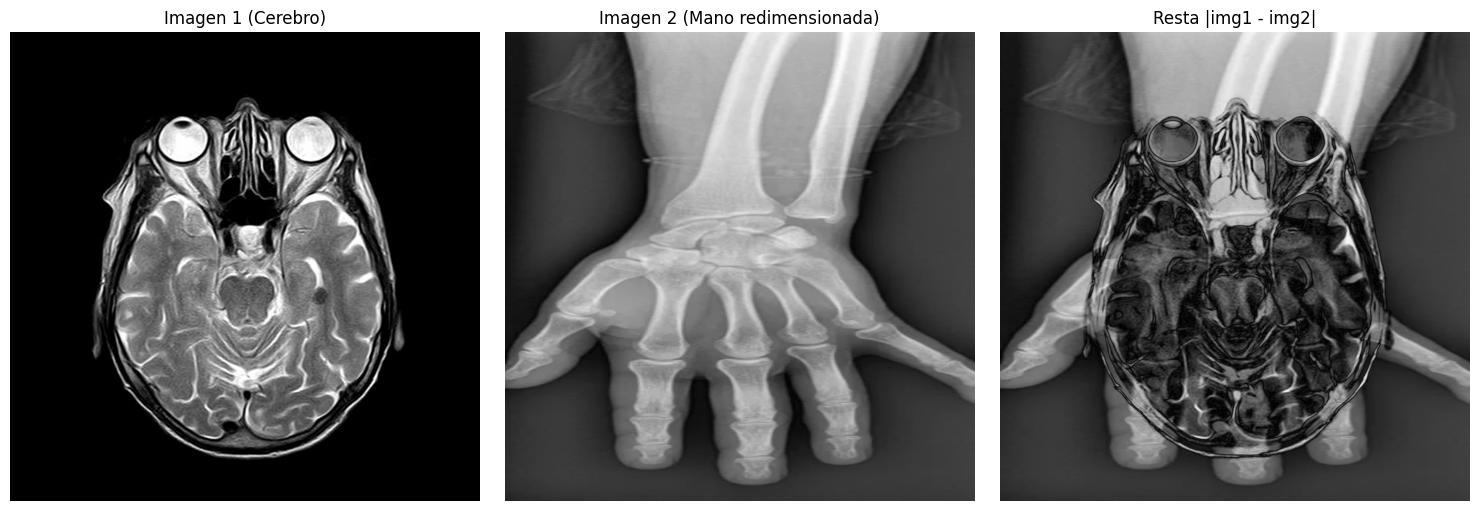

In [ ]:
# Resta absoluta entre las dos imágenes
resta = cv2.absdiff(img1, img2_resized)

# Mostrar resultados
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

axs[0].imshow(img1, cmap='gray')
axs[0].set_title('Imagen 1 (Cerebro)')
axs[0].axis('off')

axs[1].imshow(img2_resized, cmap='gray')
axs[1].set_title('Imagen 2 (Mano redimensionada)')
axs[1].axis('off')

axs[2].imshow(resta, cmap='gray')
axs[2].set_title('Resta |img1 - img2|')
axs[2].axis('off')

plt.tight_layout()
plt.show()


Se realizó la resta entre las imágenes usando cv2.absdiff para evitar valores negativos.
Esta operación destaca las diferencias entre ambas imágenes.
Es útil para detectar cambios o alteraciones visuales entre dos estudios médicos.

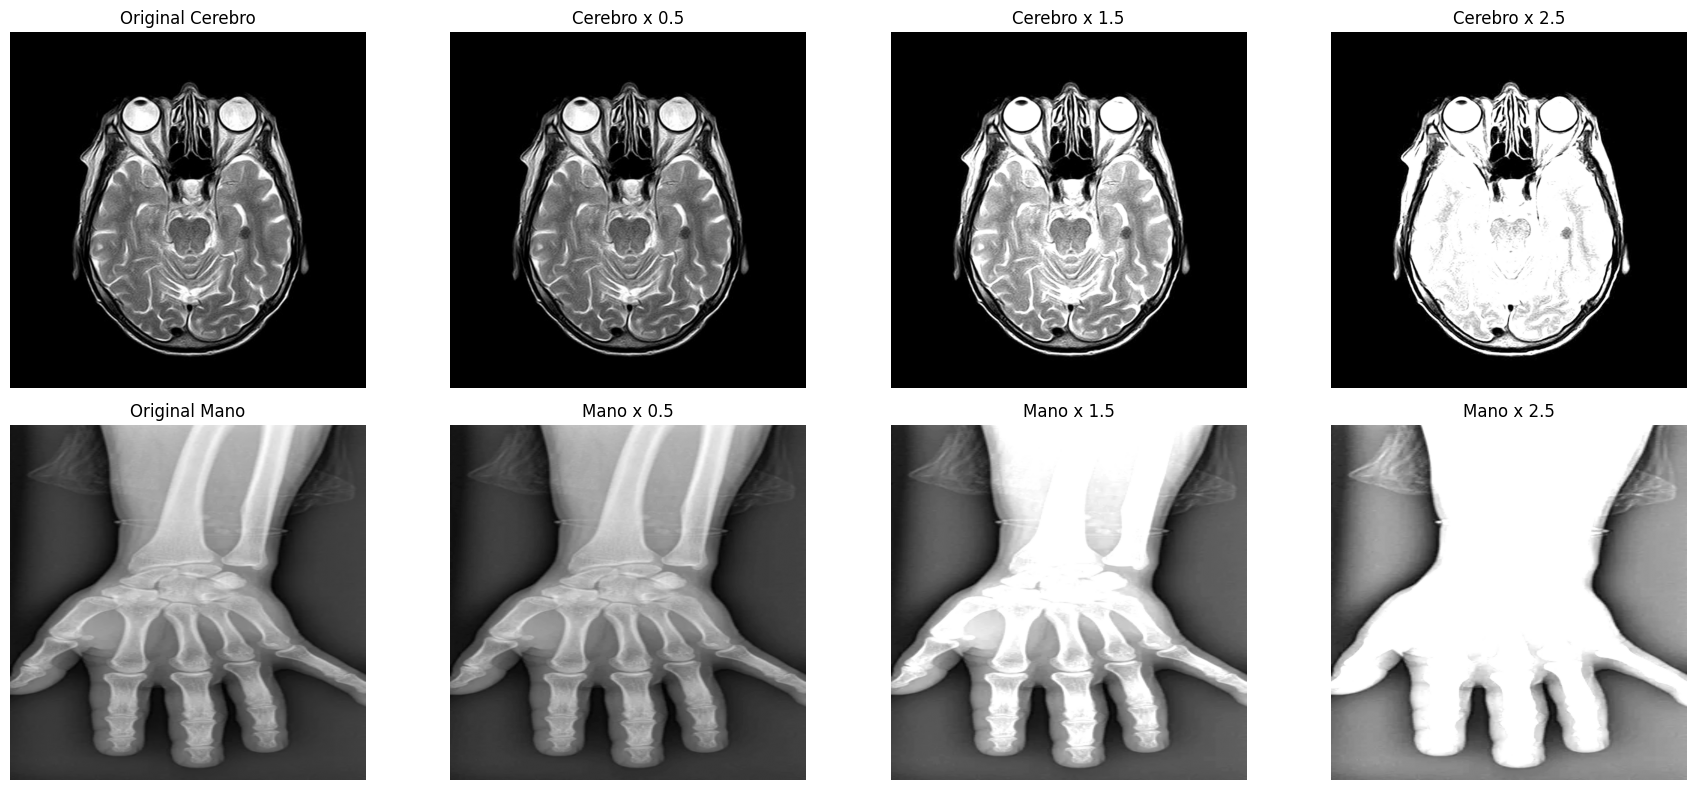

In [ ]:
# Factores de brillo
factores = [0.5, 1.5, 2.5]

# Aplicar factores a las imágenes
imagenes_cerebro = [cv2.convertScaleAbs(img1, alpha=f) for f in factores]
imagenes_mano = [cv2.convertScaleAbs(img2_resized, alpha=f) for f in factores]

# Mostrar resultados
fig, axs = plt.subplots(2, 4, figsize=(18, 8))

axs[0, 0].imshow(img1, cmap='gray')
axs[0, 0].set_title('Original Cerebro')
axs[0, 0].axis('off')

for i, f in enumerate(factores):
    axs[0, i + 1].imshow(imagenes_cerebro[i], cmap='gray')
    axs[0, i + 1].set_title(f'Cerebro x {f}')
    axs[0, i + 1].axis('off')

axs[1, 0].imshow(img2_resized, cmap='gray')
axs[1, 0].set_title('Original Mano')
axs[1, 0].axis('off')

for i, f in enumerate(factores):
    axs[1, i + 1].imshow(imagenes_mano[i], cmap='gray')
    axs[1, i + 1].set_title(f'Mano x {f}')
    axs[1, i + 1].axis('off')

plt.tight_layout()
plt.show()


Se aplicaron factores de brillo (0.5, 1.5, 2.5) a cada imagen para observar variaciones en la intensidad.
Esta técnica puede simular distintas condiciones de iluminación o mejorar el contraste.
Comparar diferentes factores ayuda a entender cómo realzar o atenuar detalles.

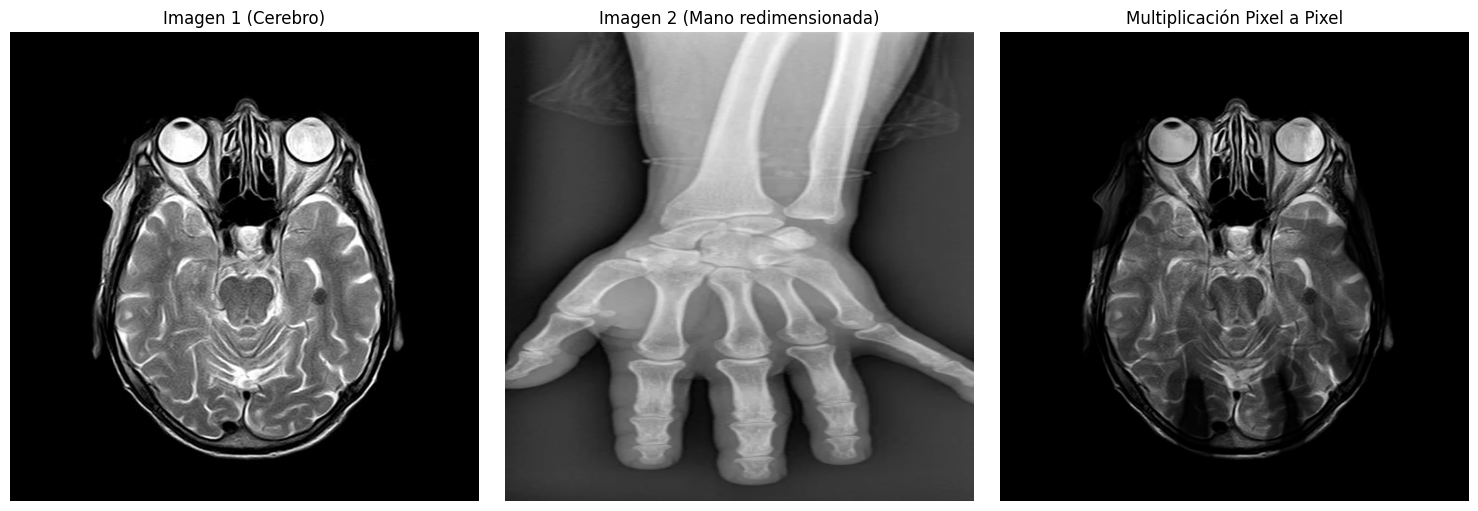

In [ ]:
# Normalizar imágenes entre 0 y 1 para evitar saturación
img1_norm = img1 / 255.0
img2_norm = img2_resized / 255.0

# Multiplicación pixel a pixel
producto = img1_norm * img2_norm

# Escalar de regreso a [0, 255] y convertir a uint8
producto_scaled = (producto * 255).astype(np.uint8)

# Mostrar resultados
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

axs[0].imshow(img1, cmap='gray')
axs[0].set_title('Imagen 1 (Cerebro)')
axs[0].axis('off')

axs[1].imshow(img2_resized, cmap='gray')
axs[1].set_title('Imagen 2 (Mano redimensionada)')
axs[1].axis('off')

axs[2].imshow(producto_scaled, cmap='gray')
axs[2].set_title('Multiplicación Pixel a Pixel')
axs[2].axis('off')

plt.tight_layout()
plt.show()


Este tipo de operación puede usarse para enmascarar regiones específicas, por ejemplo, al aplicar una máscara binaria sobre una imagen médica para resaltar o eliminar áreas de interés (tumores, huesos, tejidos, etc.).
Se multiplicaron ambas imágenes píxel a píxel después de normalizarlas.
Este tipo de operación puede aplicarse para enmascarar regiones específicas en imágenes médicas.
El resultado conserva zonas comunes de ambas imágenes, útil en segmentación.

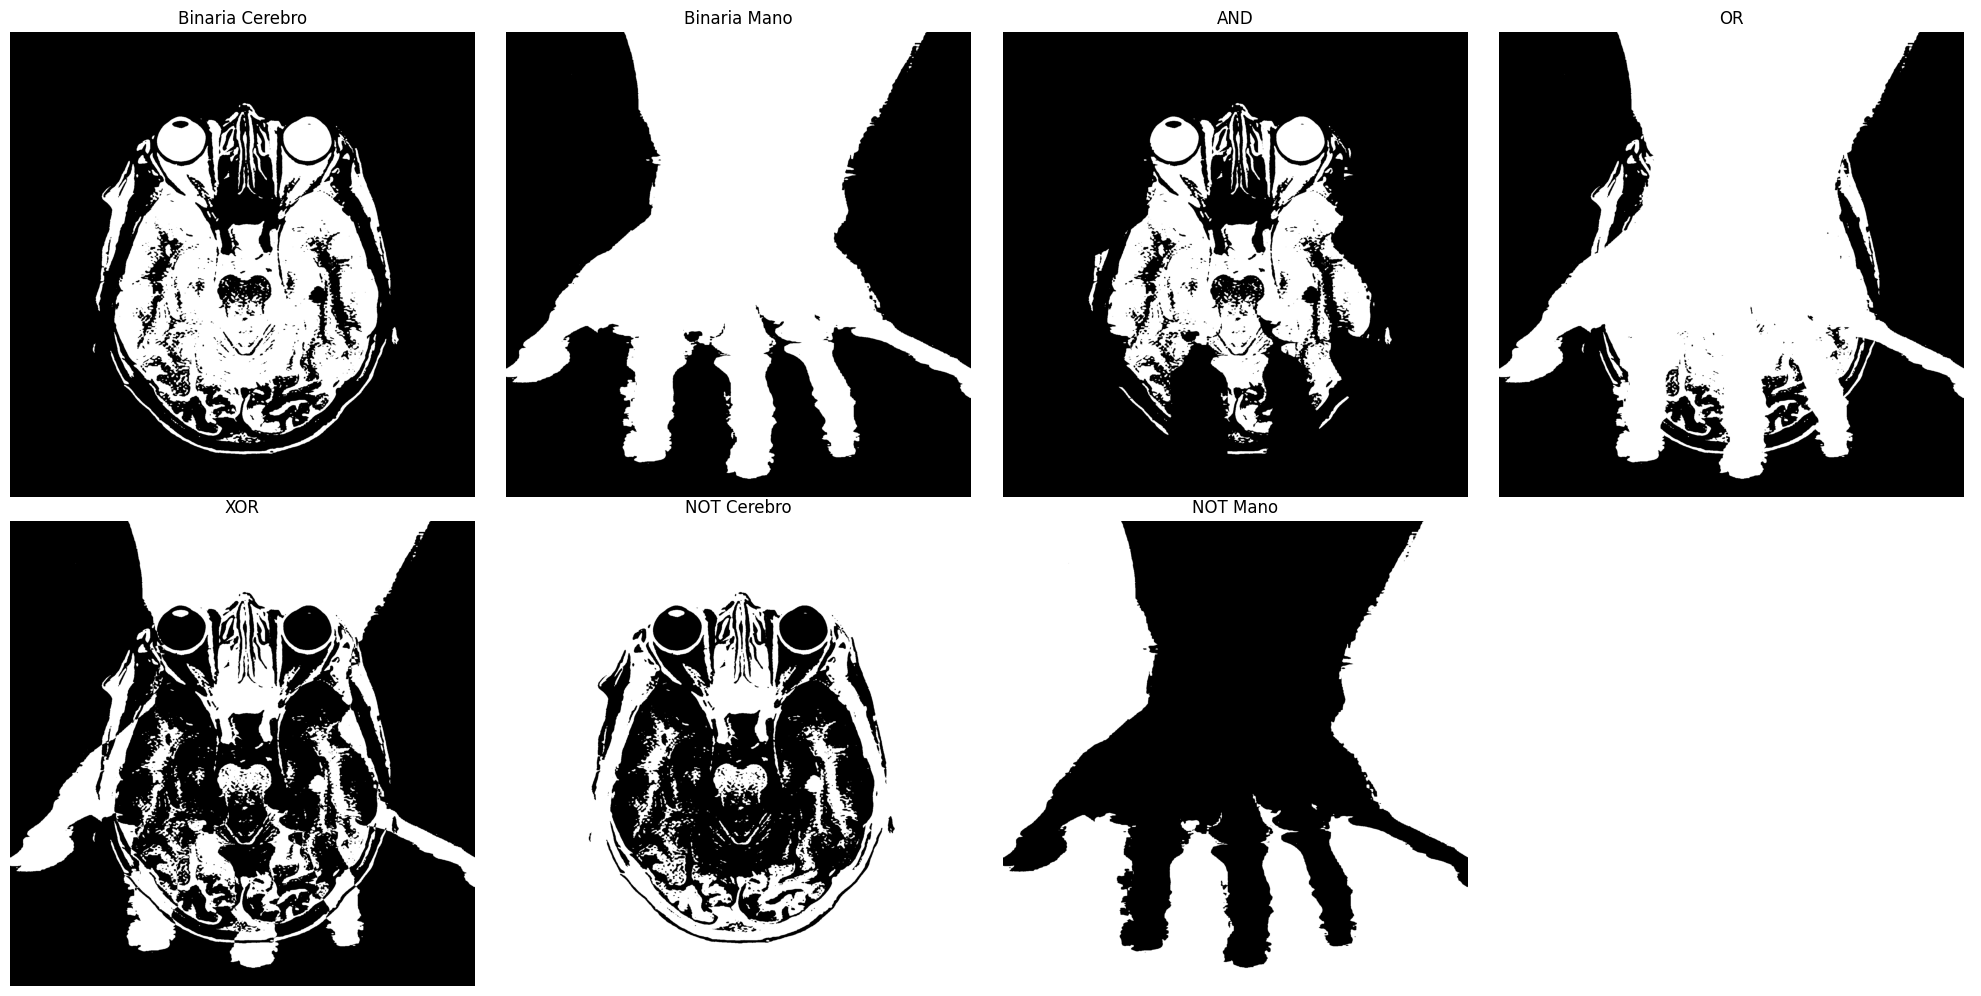

In [ ]:
# Binarización con umbral
_, bin1 = cv2.threshold(img1, 100, 255, cv2.THRESH_BINARY)
_, bin2 = cv2.threshold(img2_resized, 100, 255, cv2.THRESH_BINARY)

# Operaciones lógicas
and_img = cv2.bitwise_and(bin1, bin2)
or_img = cv2.bitwise_or(bin1, bin2)
xor_img = cv2.bitwise_xor(bin1, bin2)
not1_img = cv2.bitwise_not(bin1)
not2_img = cv2.bitwise_not(bin2)

# Mostrar resultados
fig, axs = plt.subplots(2, 4, figsize=(20, 10))

axs[0, 0].imshow(bin1, cmap='gray')
axs[0, 0].set_title('Binaria Cerebro')
axs[0, 0].axis('off')

axs[0, 1].imshow(bin2, cmap='gray')
axs[0, 1].set_title('Binaria Mano')
axs[0, 1].axis('off')

axs[0, 2].imshow(and_img, cmap='gray')
axs[0, 2].set_title('AND')
axs[0, 2].axis('off')

axs[0, 3].imshow(or_img, cmap='gray')
axs[0, 3].set_title('OR')
axs[0, 3].axis('off')

axs[1, 0].imshow(xor_img, cmap='gray')
axs[1, 0].set_title('XOR')
axs[1, 0].axis('off')

axs[1, 1].imshow(not1_img, cmap='gray')
axs[1, 1].set_title('NOT Cerebro')
axs[1, 1].axis('off')

axs[1, 2].imshow(not2_img, cmap='gray')
axs[1, 2].set_title('NOT Mano')
axs[1, 2].axis('off')

axs[1, 3].axis('off')  # celda vacía

plt.tight_layout()
plt.show()


Se binarizaron las imágenes mediante umbral y se aplicaron operaciones lógicas básicas.
Estas técnicas son esenciales en el procesamiento de imágenes para segmentación y análisis estructural.
Cada operación resalta distintas combinaciones de las regiones blancas (zonas activas).